# Overview


We kick things off with a few more administrative things. 

It might seem boring to hear about admin, **but this is the stuff you need to know to do well in the class**. So I recommend watching and paying attention!

Then, we kick into gear and get started on the actual work. This week is about getting familiar with networks, and we'll focus on four main elements

* A short talk on the basic mathematical description of networks
* The `NetworkX` library 
* Matplotlib, binning, and plotting degree distributions
* Random networks

(The work-load is still a little bit light, since we want to allow those who are not super-strong at programming a bit of time to catch up. If you're bored and in need of extra work, let me know and I'll point you in the right direction.)

# Part 0: The Admin Stuff 
### (GitHub Page Overview Edition)

Last week, I gave you a lot of practical information about how to follow the class and discussed the principles of how I teach. How each lecture is structured to maximize your learning according to state-of-the-art principles. 

This week, the admin video talks about the structure of the Course Page, which actually contains a lot of useful information. 

You'll notice that I've made it for the class that runs in the spring (Social Data Analysis and Visualization), but the web-page structure is similar, so everyhting should still work.

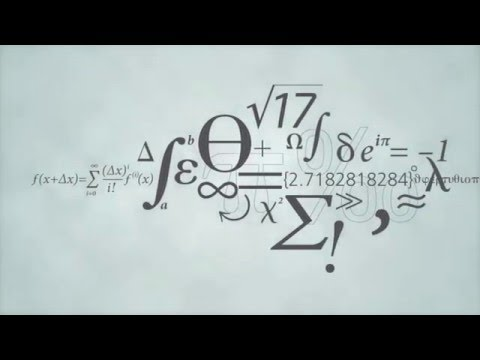

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("42KjmxgYYNI",width=800, height=450)

Next week, I'll talk about the final elements of admin we have to cover for now

* Forming groups
* Handing in assignments
* Peer Evaluations
* The structure of the class

# Part 1: Basic mathematical description of networks

This week, let's start with some lecturing. I love networks, so I'll take some time today to tell you about them.

> **_Video Lecture_**. Then check out a few comments on "Network Notation" (don't worry it's short). 

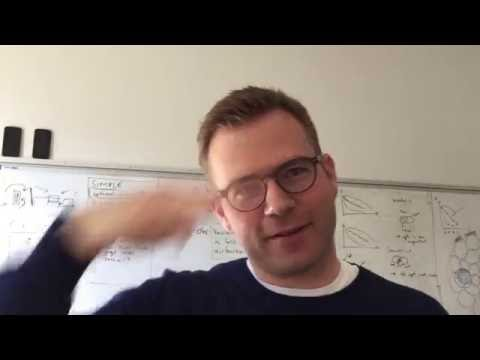

In [2]:
YouTubeVideo("MMziC5xktHs",width=800, height=450)

Now for some reading

> _Reading_. We'll be reading the textbook _Network Science_ (NS) by Laszlo Barabasi. You can read the whole 
> thing for free [**here**](http://barabasi.com/networksciencebook/). 
>
> * Read chapter 2\.
> 

And the associated exercises

> *Exercises*: Chapter 2 in *Network Science*.
> 
> * Section 2.5 states that real networks are sparse. Can you think of a real network where each node has _many_ connections? Is that network still sparse? If yes, can you explain why?
> 
> There are more questions on Chapter 2 below.
> 

# Part 2: Exercises using the `NetworkX` library

Let's try to solve a few of the exercises from the book using `NetworkX`

> *Exercises*:
> 
> * Go to NS Section 2.12: Homework, then
>   * Write the solution exercise **2.1** (the 'Königsberg Problem') from NS in your `notebook`. 
>   * Solve exercise **2.3** ('Graph representation') from NS using `NetworkX` in your `notebook`. (You don't have to solve the last sub-question about *cycles of length 4* ... but I'll be impressed if you do it).
>   * Solve exercise **2.5** ('Bipartite Networks') from NS using `NetworkX` in your `notebook`. *Important note*: There is a a mistake in the book. When it says "Block diagonal", they mean "Anti-diagonal" (all elements are away from the diagonal blocks). 
>     - *Note*: For those without the physical book (and therefore no exercise numbers), the part "Bipartite Networks - General Considerations" does not need to be solved (the two last questions do not make much sense to me).
> 

In [35]:
import networkx as nx

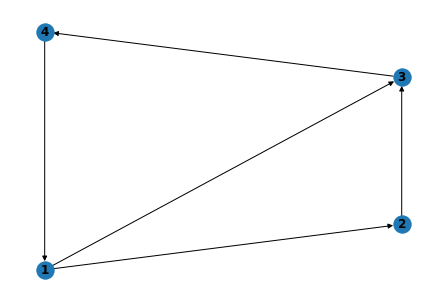

In [33]:
# 2.1
G = nx.DiGraph()
G.add_nodes_from([1,2,3,4])
G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(1,3)])
nx.draw_shell(G,nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

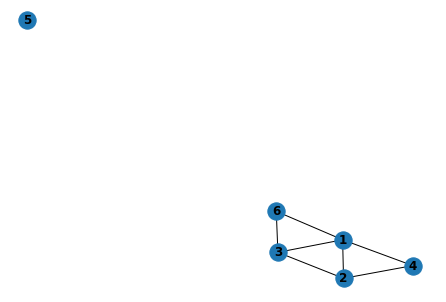

In [46]:
# 2.3
AG = nx.Graph()
AG.add_nodes_from([1,2,3,4,5,6])
AG.add_edges_from([(1,2),(2,3),(2,4),(3,1),(4,1),(6,1),(6,3)])
nx.draw(AG, with_labels=True, font_weight='bold')

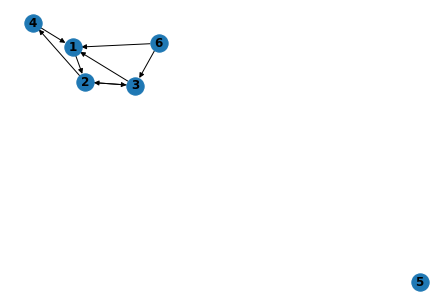

In [47]:
DiG = nx.DiGraph()
DiG.add_nodes_from([1,2,3,4,5,6])
DiG.add_edges_from([(1,2),(2,3),(2,4),(3,1),(3,2),(4,1),(6,1),(6,3)])
nx.draw(DiG, with_labels=True, font_weight='bold')

In [62]:
from networkx.linalg.graphmatrix import adjacency_matrix
# Adjacency matrix
print("AG\n",adjacency_matrix(AG).todense())
print("DiG\n",adjacency_matrix(DiG).todense())

AG
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
DiG
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [69]:
# Linked lists
print("AG\n", AG.edges())
print("DiG\n", DiG.edges())

AG
 [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]
DiG
 [(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)]


In [72]:
# Clustering coefficient
from networkx.algorithms.cluster import average_clustering
print("AG\n", average_clustering(AG))
print("DiG\n", average_clustering(DiG))

AG
 0.6388888888888888
DiG
 0.32222222222222224


Swapping labels 5 and 6 will do exactly that, swap the labels in linked lists and move the 1's and 0's in the adjacency matrix. The notable part is that this action will add 5 to the linked list, it was not there before and remove 6.

The only thing you can't infer form the link list representation of the network is the pressence of nodes with no links.

In [105]:
from networkx.algorithms.simple_paths import all_simple_paths
# It depends if you count nodes or edges
print("counting nodes")
print("AG\n", len([path for path in list(all_simple_paths(AG, 1, 3)) if len(path) == 3]))
print("DiG\n", len([path for path in list(all_simple_paths(DiG, 1, 3)) if len(path) == 3]))
print("counting edges")
print("AG\n", len([path for path in list(all_simple_paths(AG, 1, 3)) if len(path) == 4]))
print("DiG\n", len([path for path in list(all_simple_paths(DiG, 1, 3)) if len(path) == 4]))

counting nodes
AG
 2
DiG
 1
counting edges
AG
 1
DiG
 0


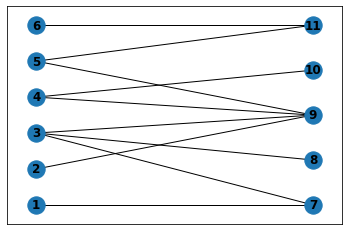

In [125]:

BN = nx.Graph()
BN.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
BN.add_edges_from([(1,7),(2,9),(3,7),(3,8),(3,9),(4,9),(4,10),(5,9),(5,11),(6,11)])
# Bipartite Netowrk Drawing
top = nx.bipartite.sets(BN)[0]
pos = nx.bipartite_layout(BN, top)
nx.draw_networkx(BN, pos=pos, with_labels=True, font_weight='bold')

In [129]:
print(adjacency_matrix(BN).todense())
# It's Anti-diagonal because its bipartite

[[0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]]


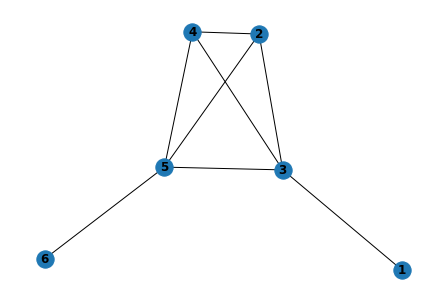

In [139]:
from networkx.algorithms.bipartite.projection import projected_graph
# Projection onto purple
ProjPurple = projected_graph(BN, [1,2,3,4,5,6])
ProjGreen = projected_graph(BN, [7,8,9,10,11])
nx.draw(ProjPurple, with_labels=True, font_weight='bold')

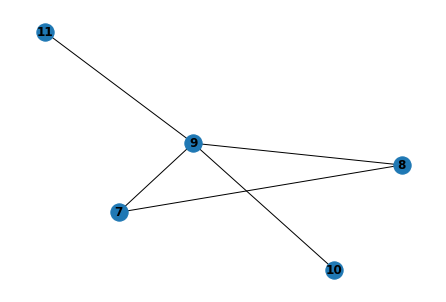

In [140]:
nx.draw(ProjGreen, with_labels=True, font_weight='bold')

In [145]:
# Adjacency matrix
print("Projection onto purple nodes\n", adjacency_matrix(ProjPurple).todense())
print("Projection onto green nodes\n", adjacency_matrix(ProjGreen).todense())

Projection onto purple nodes
 [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]
Projection onto green nodes
 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [179]:
# Degree
from networkx.algorithms.assortativity import average_neighbor_degree
purpleNodes = [1,2,3,4,5,6]
greenNodes = [7,8,9,10,11]
purpleDegs = [value[1] for value in BN.degree(purpleNodes)]
greenDegs = [value[1] for value in BN.degree(greenNodes)]
print("Average degree of purple nodes\n", sum(purpleDegs)/len(purpleDegs))
print("Average degree of green nodes\n", sum(greenDegs)/len(greenDegs))

Average degree of purple nodes
 1.6666666666666667
Average degree of green nodes
 2.0


In [182]:
purpleDegs2 = [value[1] for value in ProjPurple.degree()]
greenDegs2 = [value[1] for value in ProjGreen.degree()]
print("Average degree of purple nodes\n", sum(purpleDegs2)/len(purpleDegs2))
print("Average degree of green nodes\n", sum(greenDegs2)/len(greenDegs2))
# No it is not surprising

Average degree of purple nodes
 2.6666666666666665
Average degree of green nodes
 2.0


> **_Video Lecture_**: Once again, it's time to stop working for a couple of minutes to hear me talk about plotting with `NetworkX`. 
> 

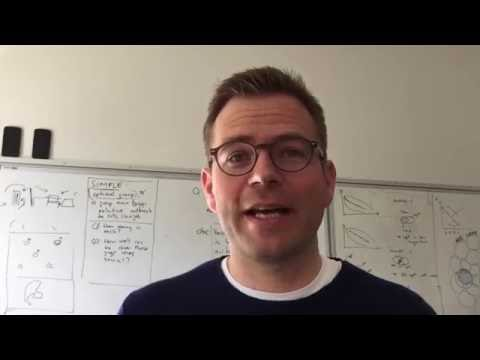

In [183]:
YouTubeVideo("iDlb9On_TDQ",width=800, height=450)

# Part 3: Plotting degree distributions

As always we'll learn about degree-distribution plotting by creating a `notebook` and trying it out. 

As a little public service announcement about this exercise: I know that you've probably tried binning data before. And that there are many functions designed to make binning easy, so there is a good chance that you think that binning data into bins is something that you don't have to worry about.

**BUT** ... with this exercise, I aim to convince you that binning isn't always trivial. And that there are key things to think about every time you need to put data into buckets. So please read the exercise carefully. And follow my instructions carefully.


> 
> *Exercises*:
> 
> Begin by importing the right packages. Start by importing `matplotlib.pyplot` (for plotting), `numpy` (for binning and other stuff), 
> `random` (for generating random numbers), and `networkx` (for generating networks.)
> 
> * Binning real numbers
>   * Let's do a gentle start and use the `random` library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.
>   * Now, let's use `numpy.histogram` to bin those number into 10 bins. What does the `numpy.histogram` function return? Do the two arrays have the same length?
>   * Then we use `matplotlib.pyplot.plot` to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.
> * Binning integers
>   * But binning real numbers into a fixed number of bins is easy when `numpy.histogram` does all the work and finds the right bin boundaries for you. 
> Now we'll generate a bunch of integers and set the bin boundaries manually. This time, let's grab data from a Poisson distribution. As it turns out 
> `numpy` also has some convenient random number generators. Use `numpy.random.poisson` to generate 5000 numbers drawn from a Poisson distribution 
> characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers. 
>   * Instead of simply specifying the number of bins for `numpy.histogram`, let's specify the bins we want using a vector. 
> Create a vector $v$
> that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, 
> and the last bin contains the maximum number. 
> Use the vector by setting `numpy.histogram`'s `bin` parameter as `bin = ` $v$. 
> What is the sum over bin counts? Explain how the binning-vectors first and last element 
> relates to the min and max from the Poisson distribution.
>   * Now, use a bar chart (`matplotlib.pyplot.bar`) to plot the distribution 
> * Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.
> 

# Part 4: Random networks

> **_Video Lecture_**. Now it's time to relax and watch a few minutes of info on _Random Networks_. 

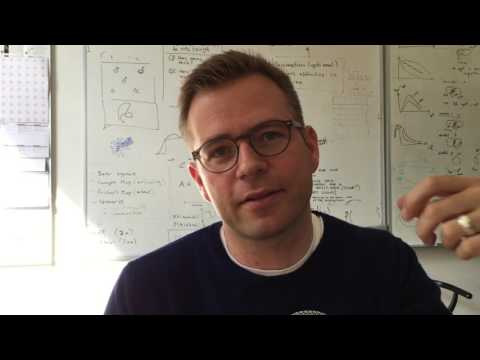

In [6]:
YouTubeVideo("c_SbQCzgqb0",width=800, height=450)

> _Reading_. Read section 3.1-3.7 (the most important part is 3.1-3.4) of Chapter 3 of _Network Science_. You can find the entire book [**here**](http://barabasi.com/networksciencebook/).


> _Exercises_ (should be completed in a `notebook`):
> 
> * Work through NS exercise 3.1 ('Erdős-Rényi Networks'). The exercise can be found in Section 3.11: Homework.
> * Paths. Plot a random network with 200 nodes and an average degree of 1.5\. (I suggest using `networkx.draw` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
>   * Extract the Giant Connected Component, GCC. (Hint: You can use `networkx.connected_component_subgraphs` <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use `nx.connected_components(G)` and `G.subgraph(c).copy()`)
>   * Choose a node at random from the GCC. (Hint: You may want to try `random.choice`.)
>   * Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest `networkx.single_source_shortest_path_length`)
>   * Plot the GCC with the following choice of colors. Starting node _black_ (`"#000000"`). The nodes 2 steps away _red_ (`"#ff0000"`). All other nodes _blue_ (`"#A0CBE2"`). Again, I suggest using `networkx.draw()` and reading [the documentation](https://networkx.github.io/documentation/stable/reference/drawing.html) carefully find out how to color individual nodes.
> 

By the way, the default plot coming out of `networkx` doesn't look like the one below. But by tweaking parameters, you should be able to create something that looks like it.

![Sune's Network](https://raw.githubusercontent.com/suneman/socialgraphs2019/master/files/edge_colormap.png)